<a href="https://colab.research.google.com/github/milqsimmer/IA905a/blob/main/Ex04_261300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Camila Maria Serra Quadros

RA: 261300

Curso: Mestrado - Aluno especial



# Ex04 - Filtragem de Imagens

Nesta atividade vamos entender a operação de convolução e o uso da mesma para filtragem de imagens. Testaremos o uso de **filtros suavizantes**, usados para a remoção de ruído, e **filtros aguçantes**, usados para detecção de bordas.  

- **Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

- **Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Alguns dos filtros aguçantes comuns são: Filtro de Sobel, Filtro de Prewitt, Filtro Laplaciano.

Veja mais no notebook sobre [Filtragem no domínio espacial](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/07_Filtragem_no_dominio_espacial.ipynb)

In [1]:
# Importando as bibliotecas que serão utilizadas
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import random

# Definindo o nome da pasta compartilhada
# IMPORTANTE: substitua "NOME_DA_PASTA_COMPARTILHADA" abaixo pelo nome correspondente
pasta_compartilhada = "P_IA905A_2024S1"

In [2]:
# Conexão do colab com o drive
from google.colab import drive
drive.mount('/content/gdrive')
path = f"gdrive/MyDrive/{pasta_compartilhada}/Dados/Ex04/"

Mounted at /content/gdrive


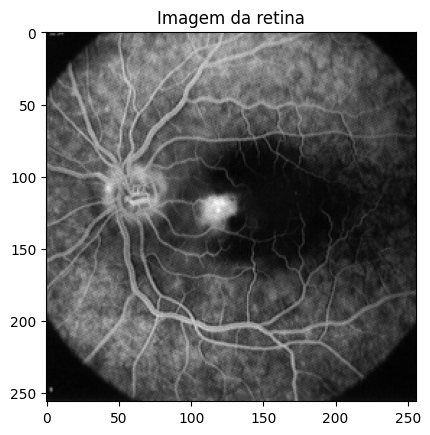

In [3]:
%matplotlib inline
f = mpimg.imread(path+'retina.tif')
plt.title('Imagem da retina')
plt.imshow(f,cmap='gray')

**ATENÇÃO** - as operações de filtragem alteram os valores e eles podem sair da faixa de 0 a 255. Portanto, fique atento à maneira como você está realizando as operações e visualizando os resultados. Algumas dicas:

- Uma boa prática é realizar as operações em ponto flutuante;
- Quando a visualização não corresponde ao esperado, desconfie que os valores sairam da escala e que os valores, de alguma maneira, estão sendo truncados.

## Parte 1 - Operação de convolução e filtro da média

### Exercício 1.1

Entenda o uso da operação de convolução e experimente usá-la para entender o filtro da média. Siga o seguinte roteiro:
- Crie uma imagem numérica pequena (7x7, por exemplo), crie um filtro de média (kernel 3x3) e use a função **convolve()** da biblioteca **scipy.ndimage** para realizar a filtragem. Verifique numericamente que a filtragem está correta;
- Repita a operação de filtragem na imagem da retina e visualize o resultado;
- Faça experimentos com a imagem da retina variando o tamanho do filtro e compare as imagens resultantes;
- Não se esqueça de comentar os métodos utilizados e resultados obtidos.

In [40]:
''''Precisei voltar e definir o tipo para float pois o filtro não estava apresentando os valores esperados'''

# imagem a
a = np.ones((7,7), dtype="float64")
print("Imagem A:\n",a)
print("Dimensões da imagem:",a.shape)
print("Tipo da imagem:",a.dtype)

# plt.figure(figsize=(5, 4))
# plt.imshow(a,cmap='gray')
# plt.title('Imagem A')
# plt.colorbar()

Imagem A:
 [[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
Dimensões da imagem: (7, 7)
Tipo da imagem: float64


In [47]:
# imagem b

b = np.arange(0,49,1, dtype="float64").reshape(7,7)
print ('Imagem b:\n', b)
print ('Shape:\n', b.shape)
print("Tipo da imagem:",b.dtype)

# plt.figure(figsize=(5, 4))
# plt.imshow(b,cmap='gray')
# plt.title('Imagem B')
# plt.colorbar()

Imagem b:
 [[ 0.  1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12. 13.]
 [14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27.]
 [28. 29. 30. 31. 32. 33. 34.]
 [35. 36. 37. 38. 39. 40. 41.]
 [42. 43. 44. 45. 46. 47. 48.]]
Shape:
 (7, 7)
Tipo da imagem: float64


In [46]:
# imagem c

c = np.zeros([7,7], dtype="float64")
c[1:6,1:6]=[2]
c[2:5,2:5]=[4]
c[3:4,3:4]=[6]

print("Imagem C:\n",c)
print("Dimensões da imagem:",c.shape)
print("Tipo da imagem:",c.dtype)

# plt.figure(figsize=(5, 4))
# plt.imshow(c,cmap='gray')
# plt.title('Imagem C')
# plt.colorbar()

Imagem C:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 2. 2. 0.]
 [0. 2. 4. 4. 4. 2. 0.]
 [0. 2. 4. 6. 4. 2. 0.]
 [0. 2. 4. 4. 4. 2. 0.]
 [0. 2. 2. 2. 2. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Dimensões da imagem: (7, 7)
Tipo da imagem: float64


In [44]:
rows = np.arange(7, dtype="float64")
cols = np.arange(7, dtype="float64")
ro, co = np.meshgrid(rows, cols, indexing='ij')
d = (ro + co) % 2

print("Imagem D:\n",d)
print("Dimensões da imagem:",d.shape)
print("Dimensões da imagem:",d.dtype)

# plt.figure(figsize=(5, 4))
# plt.imshow(d,cmap='gray')
# plt.title('Imagem D')
# plt.colorbar()

Imagem D:
 [[0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]]
Dimensões da imagem: (7, 7)
Dimensões da imagem: float64


In [8]:
# fig, axs = plt.subplots(1,4,figsize=(15, 6))

# axs[0].imshow(a,cmap='gray')
# axs[0].set_title('Imagem A')
# axs[1].imshow(b,cmap='gray')
# axs[1].set_title('Imagem B')
# axs[2].imshow(c,cmap='gray')
# axs[2].set_title('Imagem C')
# axs[3].imshow(d,cmap='gray')
# axs[3].set_title('Imagem D')

# plt.show()

Text(0.5, 1.0, 'Imagem D')

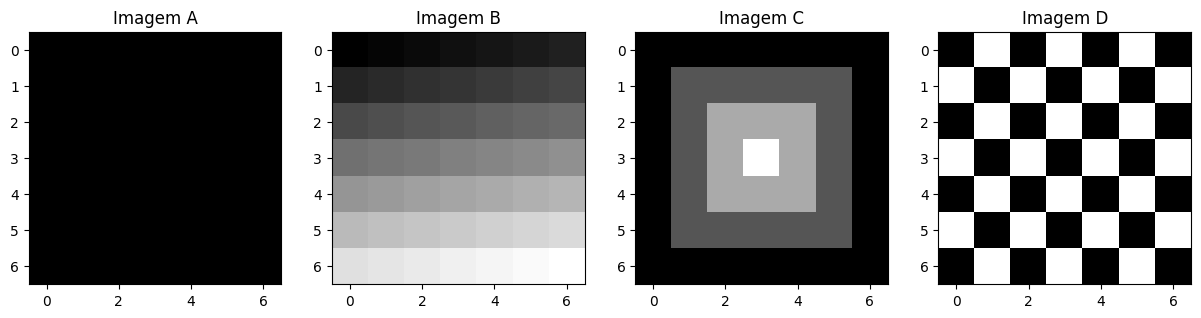

In [48]:
fig, axs = plt.subplots(1,4, figsize=(15, 6))


plt.subplot(141)
plt.imshow(a, cmap='gray')
plt.title('Imagem A')

plt.subplot(142)
plt.imshow(b, cmap='gray')
plt.title('Imagem B')

plt.subplot(143)
plt.imshow(c, cmap='gray')
plt.title('Imagem C')

plt.subplot(144)
plt.imshow(d, cmap='gray')
plt.title('Imagem D')

In [49]:
# filter kernel 3x3 mean

kernel = np.ones([3,3])
kernel[:] = 1/9

print("Filtro 3x3 :\n",kernel)
print("Dimensões da imagem:",kernel.shape)

# referencia: https://bioimagebook.github.io/chapters/2-processing/4-filters/filters.html#:~:text=A%20simple%203%C3%973,all%20coefficients%20sum%20to%201.

Filtro 3x3 :
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Dimensões da imagem: (3, 3)


In [57]:
'''Para o tratamento de borda escolhi usar o mode nearest, que duplica o pixel mais próximo'''

from scipy import ndimage
np.set_printoptions(suppress=True, precision=3)

# Imagem A
a_filtrada = ndimage.convolve(a, kernel, mode='nearest')
print("# Imagem A Filtrada:\n",a_filtrada) # espera-se que os números se mantenham igual
print(" Dimensões da imagem:",a_filtrada.shape)
print("\n")

# Imagem B
''' Imagem b:
 [[ 0  1  2  3  4  5  6]
 [ 7  8  9 *10* 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]
 [42 43 44 45 46 47 48]]
'''

# teste_b=(2+3+4+9+10+11+16+17+18)/9 # casa 1x3
# teste_b=(0+1+2+7+8+9+14+15+16)/9 # casa 1x1
teste_b=(12+13+13+19+20+20+26+27+27)/9 # casa 2x6

b_filtrada = ndimage.convolve(b, kernel, mode='nearest')
print("# Imagem B Filtrada:\n",b_filtrada)
print(" Dimensões da imagem:",b_filtrada.shape)
print(" Teste do filtro: ", round(teste_b,3)) # espera-se que dê o mesmo valor na casa filtrada que deu no teste
print("\n")

# Imagem C
'''Imagem C:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 2. 2. 0.]
 [0. 2. 4. 4. 4. 2. 0.]
 [0. 2. 4. 6. 4. 2. 0.]
 [0. 2. 4. 4. 4. 2. 0.]
 [0. 2. 2. 2. 2. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]'''

teste_c = (2+2+2+2+4+4+2+4+6)/9 # casa 2x2

c_filtrada = ndimage.convolve(c, kernel, mode='nearest')
print("# Imagem C Filtrada:\n",c_filtrada)
print(" Dimensões da imagem:",c_filtrada.shape)
print(" Teste do filtro: ", round(teste_c,3)) # espera-se que dê o mesmo valor na casa filtrada que deu no teste
print("\n")

# Imagem D
'''Imagem D:
 [[0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]]'''

teste_d = (0+1+0+1+0+1+0+1+0)/9 # casa 1x1

d_filtrada = ndimage.convolve(d, kernel, mode='nearest')
print("# Imagem D Filtrada:\n",d_filtrada)
print(" Dimensões da imagem:",d_filtrada.shape)
print(" Teste do filtro: ", round(teste_d,3)) # espera-se que dê o mesmo valor na casa filtrada que deu no teste

# Imagem A Filtrada:
 [[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
 Dimensões da imagem: (7, 7)


# Imagem B Filtrada:
 [[ 2.667  3.333  4.333  5.333  6.333  7.333  8.   ]
 [ 7.333  8.     9.    10.    11.    12.    12.667]
 [14.333 15.    16.    17.    18.    19.    19.667]
 [21.333 22.    23.    24.    25.    26.    26.667]
 [28.333 29.    30.    31.    32.    33.    33.667]
 [35.333 36.    37.    38.    39.    40.    40.667]
 [40.    40.667 41.667 42.667 43.667 44.667 45.333]]
 Dimensões da imagem: (7, 7)
 Teste do filtro:  19.667


# Imagem C Filtrada:
 [[0.222 0.444 0.667 0.667 0.667 0.444 0.222]
 [0.444 1.111 1.778 2.    1.778 1.111 0.444]
 [0.667 1.778 3.111 3.556 3.111 1.778 0.667]
 [0.667 2.    3.556 4.222 3.556 2.    0.667]
 [0.667 1.778 3.111 3.556 3.111 1.778 0.667]
 [0.444 1.111 1.778 2.    1.778 1.111 0.444]
 [0.222 0.444 0.667 0.667 0.667 0.444 0.22

Text(0.5, 1.0, 'Imagem D Filtrada')

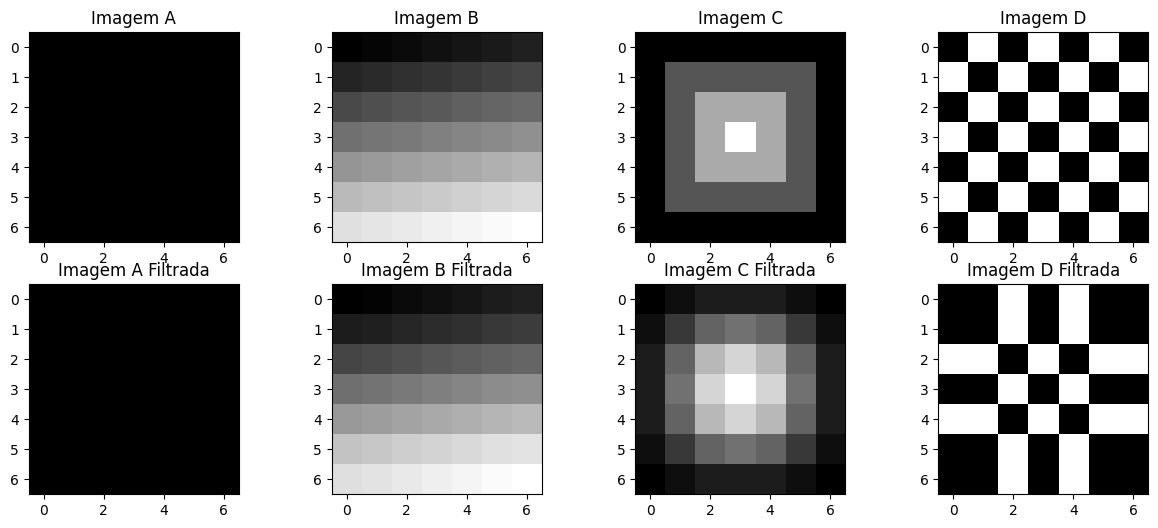

In [59]:
fig, axs = plt.subplots(2,4, figsize=(15, 6))


plt.subplot(241)
plt.imshow(a, cmap='gray')
plt.title('Imagem A')

plt.subplot(242)
plt.imshow(b, cmap='gray')
plt.title('Imagem B')

plt.subplot(243)
plt.imshow(c, cmap='gray')
plt.title('Imagem C')

plt.subplot(244)
plt.imshow(d, cmap='gray')
plt.title('Imagem D')

plt.subplot(245)
plt.imshow(a_filtrada, cmap='gray')
plt.title('Imagem A Filtrada')

plt.subplot(246)
plt.imshow(b_filtrada, cmap='gray')
plt.title('Imagem B Filtrada')

plt.subplot(247)
plt.imshow(c_filtrada, cmap='gray')
plt.title('Imagem C Filtrada')

plt.subplot(248)
plt.imshow(d_filtrada, cmap='gray')
plt.title('Imagem D Filtrada')

### Exercício 1.2

Repita a operação de filtragem, desta vez variando também o modo de tratamento de borda da função **convolve()** - '*reflect*', '*constant*', '*nearest*', '*mirror*', '*wrap*' - explicando as diferenças encontradas. Dica, você só conseguirá visualizar as diferenças se aumentar o tamanho da máscara (filtro).

In [ ]:
# Seu código aqui

## Parte 2 - Filtro gaussiano e redução de ruído

### Exercício 2.1

Teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3). Crie também o filtro bi-dimensional diretamente e cheque se os resultados são equivalentes. Comente os métodos utilizados.

In [ ]:
# Seu código aqui

### Exercício 2.2

Teste a aplicação de filtros suavizantes para redução de ruído: Adicione ruído gaussiano à imagem da retina (sugestão: use **np.random**) e depois tente remover o ruído com o filtro da média e com o filtro gaussiano. Você pode aumentar os filtros se quiser. Comente os métodos utilizados e resultados obtidos.

In [ ]:
# Seu código aqui

## Parte 3 - Filtro de Sobel e detecção de bordas

Existem vários filtros que procuram realçar as bordas da imagem. Um dos mais conhecidos é o Operador Sobel, composto por uma máscara vertical (Sv) e uma máscara horizontal (Sh).

In [ ]:
Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print('Sv =\n',Sv)

Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print('Sh =\n',Sh)

Para detectar bordas de uma imagem usando o Filtro de Sobel, precisamos fazer a filtragem da imagem usando tanto a máscara vertical, quanto a horizontal. No final, acabaremos com 2 imagens resultantes, uma reforçando as bordas verticais e outra reforçando as bordas horizontais, como exemplificado abaixo.

In [ ]:
img = mpimg.imread(path+'keyb.tif')
img_sv = mpimg.imread(path+'keyb_sv.tif')
img_sh = mpimg.imread(path+'keyb_sh.tif')

fig, axs = plt.subplots(1,3, figsize=(12, 4))
plt.tight_layout()

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Imagem original')

plt.subplot(132)
plt.imshow(img_sv,cmap='gray')
plt.title('Após operador vertical (Sv)')

plt.subplot(133)
plt.imshow(img_sh,cmap='gray')
plt.title('Após operador horizontal (Sh)');

### Exercício 3.1 - Visualizando as bordas verticais e horizontais em 2 imagens separadas

Experimente filtrar as imagens abaixo com os Filtros de Sobel vertical e horizontal e visualize o resultado. Para cada imagem, você deve obter uma imagem fitrada pelo Filtro de Sobel vertical - **fv** - e uma imagem filtrada pelo Filtro de Sobel horizontal - **fh**. Comente sobre os resultados obtidos. As imagens geradas estão de acordo com o exemplo apresentado para a imagem da calculadora? Em caso negativo, explique o porquê e tente fazer com que as imagens fiquem mais semelhantes.

In [ ]:
img1 = mpimg.imread(path+'retina.tif')

In [ ]:
# Seu código aqui

---

In [ ]:
img2 = mpimg.imread(path+'cameraman.tif')

In [ ]:
# Seu código aqui

### Exercício 3.2 - Visualizando todas as bordas em uma única imagem

Para visualizar o resultado das 2 filtragens (horizontal e vertical) em uma única imagem, utilizamos a magnitude de Sobel. A função MagSobel (a ser implementada) possui como parâmetro a imagem de entrada e deve seguir a seguinte equação:

$$MagSobel = \sqrt{f_h^2 + f_v^2}$$

onde $f_h$ é a imagem de entrada convolvida com o operador de Sobel horizontal e $f_v$ é a imagem de entrada convolvida com o operador de Sobel vertical. Crie esta função e visualize a Magnitude de Sobel das imagens utilizadas no exercício 3.1.

In [ ]:
# Seu código aqui

## Parte 4 - Aprendendo filtros com CNN (opcional para EA979)

Como vimos em sala de aula, as redes neurais convolucionais (CNNs, do inglês *convolutional neural networks*) têm como base as camadas convolucionais, um banco de filtros cujos pesos são aprendidos a partir de um gabarito para predição. Para entender melhor como isso funciona, vamos praticar com redes convolucionais bem simples e visualizar como os filtros são aprendidos por elas.

Vamos utilizar um conjunto de dados composto por 60 imagens de cidades, que servirão como entradas para a nossa rede. Além das imagens originais, temos também outros dois conjuntos de imagens, obtidos após a aplicação de dois tipos de filtros diferentes nas imagens originais (Dica: ambos os filtros aplicados foram filtros vistos anteriormente neste notebook). Essas imagens filtradas servirão como nosso gabarito para que a CNN possa aprender automaticamente qual filtro foi aplicado em cada conjunto de dados, ou seja, a rede vai tentar aprender qual o filtro necessário para obter o gabarito (imagem filtrada) a partir da entrada (imagem original).

**Para mais informações sobre redes convolucionais, exemplos e boas práticas, verifique os materiais de apoio disponibilizados no classroom. Lá você vai encontrar um tutorial teórico sobre CNN, além de tutoriais práticos disponibilizados no GitHub. Recomendamos utilizar a biblioteca PyTorch, que será utilizada novamente em exercícios futuros.**

Abaixo, visualizamos uma imagem aleatória do conjunto e suas respectivas versões filtradas.

In [ ]:
path_dataset = path + 'City_images/'
selec_img = random.randint(1, 60)

img_ori = Image.open(path_dataset+'imgs_originais/'+f'{selec_img}.tif')
img_f1 = Image.open(path_dataset+'imgs_filt1/'+f'{selec_img}.tif')
img_f2 = Image.open(path_dataset+'imgs_filt2/'+f'{selec_img}.tif')

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(np.array(img_ori), cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(132)
plt.imshow(np.array(img_f1), cmap='gray')
plt.axis('off')
plt.title('Aplicação do filtro 1')
plt.subplot(133)
plt.imshow(np.array(img_f2), cmap='gray')
plt.axis('off')
plt.title('Aplicação do filtro 2');

Para facilitar a visualização dos filtros aprendidos pela rede, vamos utilizar o código abaixo, que gera um **gif** a partir de um conjunto de arrays. Tente entender o código a partir do exemplo dado.

In [ ]:
# Criando um conjunto de arrays para exemplificar o código
array_list = []
array_inicial = np.array([[0,0,0,0,0,0,0,0,0,0,0,0]]*6, dtype='uint8')
array_list.append(array_inicial)
for i in range(12):
    tmp = array_inicial.copy()
    tmp[2:4,:i+1] = 1
    array_list.append(tmp)

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Gif generation
images = np.array(array_list)
vmin = images.min()
vmax = images.max()
fig = plt.figure(figsize=(12,6))

# Function to update the image and add text annotations
def update(frame):
    plt.clf()  # Clear the previous plot
    fig.suptitle("Epoch {}".format(frame), fontsize=20) # Define the title
    plt.imshow(images[frame], vmin=vmin, vmax=vmax, cmap='gray') # Generate the image
    plt.axis('off')
    # Add text annotations
    for (i, j), value in np.ndenumerate(images[frame]):
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black', fontsize=8, backgroundcolor='white')

# Creating the animation
anim = FuncAnimation(fig, update, frames=len(images), interval=200)
# Displaying the animation in the notebook
html = anim.to_jshtml()
HTML(html)

### Exercício 4.1

Crie uma CNN composta por apenas uma camada convolucional com kernel de tamanho 3x3, que utilize as imagens originais como entrada e tenha como "gabarito" o primeiro conjunto de imagens filtradas (**imgs_filt1**). Você precisará definir uma função de loss, um otimizador para a rede e o número de épocas para treinamento. Então, treine a rede com as imagens especificadas, acompanhando os valores de loss a cada época. Você deve armazenar em uma lista os pesos do kernel da rede a cada época do treinamento.

Após o treinamento, visualize a progressão dos pesos do kernel utilizando o código de geração de **gif** dado anteriormente. Comente os métodos utilizados e resultados obtidos. A partir do **gif** obtido, você é capaz de dizer que filtro foi utilizado para gerar o conjunto de imagens da pasta **imgs_filt1**?

In [ ]:
# Seu código aqui

### Exercício 4.2

Repita o processo realizado no exercício 5.1, mas dessa vez crie uma CNN composta por duas camadas convolucionais, a primeira com kernel de tamanho 1x5 e a segunda com kernel de tamanho 5x1. Você deve utilizar como "gabarito" o segundo conjunto de imagens filtradas (**imgs_filt2**). Armazene os pesos dos kernels da rede a cada época do treinamento em duas listas, uma para cada kernel.

Após o treinamento, visualize a progressão dos pesos de cada kernel utilizando o código de geração de **gif** dado anteriormente. Comente os métodos utilizados e resultados obtidos. A partir dos **gifs** obtidos, você é capaz de dizer que filtro foi utilizado para gerar o conjunto de imagens da pasta **imgs_filt2**?

In [ ]:
# Seu código aqui